Training Features Shape: (785133, 22)
Training Labels Shape: (785133,)
Testing Features Shape: (261712, 22)
Testing Labels Shape: (261712,)
Missing values in X_train: 0
Missing values in X_test: 0
Remaining features after dropping low-importance columns:
['Column1', 'Column7', 'Column18']
Original class distribution: Counter({0: 711100, 1: 74033})
Minority class (1) count: 74033
Desired majority class (0) count: 148066


[I 2024-10-12 09:41:18,407] A new study created in memory with name: XGBoost Optimization


Adjusted class distribution: Counter({0: 148066, 1: 74033})


[I 2024-10-12 09:41:34,382] Trial 0 finished with value: 0.9920143986416282 and parameters: {'max_depth': 5, 'learning_rate': 0.0002355550070907564, 'n_estimators': 221, 'subsample': 0.7187448757366437, 'colsample_bytree': 0.9202177097988797, 'min_child_weight': 8, 'gamma': 0.003925497319942675, 'reg_alpha': 0.049559544503458286, 'reg_lambda': 0.0003095708751797045}. Best is trial 0 with value: 0.9920143986416282.
[I 2024-10-12 09:42:01,954] Trial 1 finished with value: 0.9904462374251629 and parameters: {'max_depth': 9, 'learning_rate': 0.00017836096274708384, 'n_estimators': 338, 'subsample': 0.8847160045356071, 'colsample_bytree': 0.6160162307151297, 'min_child_weight': 6, 'gamma': 0.0003709897087816663, 'reg_alpha': 0.01902140759942398, 'reg_lambda': 2.1120276360823356}. Best is trial 0 with value: 0.9920143986416282.
[I 2024-10-12 09:42:45,532] Trial 2 finished with value: 0.9921306951628411 and parameters: {'max_depth': 9, 'learning_rate': 0.001447132713958441, 'n_estimators': 49

Best XGBoost Params: {'max_depth': 6, 'learning_rate': 0.008645046253634336, 'n_estimators': 923, 'subsample': 0.6513823139270918, 'colsample_bytree': 0.8990146138829611, 'min_child_weight': 8, 'gamma': 0.0026631049886460104, 'reg_alpha': 1.4786066428364024, 'reg_lambda': 0.018996106065080804}
Best XGBoost AUC: 0.9926155070589967


[I 2024-10-12 09:52:40,208] Trial 0 finished with value: 0.9923921605655353 and parameters: {'max_depth': 3, 'learning_rate': 0.004206438570074837, 'n_estimators': 830, 'num_leaves': 40, 'subsample': 0.549989346419431, 'colsample_bytree': 0.6328198992950733, 'min_child_weight': 9, 'reg_alpha': 0.4222592980030776, 'reg_lambda': 0.28597783974893126}. Best is trial 0 with value: 0.9923921605655353.
[I 2024-10-12 09:52:58,656] Trial 1 finished with value: 0.9922200352980037 and parameters: {'max_depth': 11, 'learning_rate': 0.0007532554931069482, 'n_estimators': 198, 'num_leaves': 97, 'subsample': 0.9564942159144547, 'colsample_bytree': 0.6344793651537699, 'min_child_weight': 5, 'reg_alpha': 0.0006854812129816682, 'reg_lambda': 0.4288465702435595}. Best is trial 0 with value: 0.9923921605655353.
[I 2024-10-12 09:53:37,694] Trial 2 finished with value: 0.9925979423751065 and parameters: {'max_depth': 4, 'learning_rate': 0.011869931401152509, 'n_estimators': 678, 'num_leaves': 85, 'subsample

Best LightGBM Params: {'max_depth': 7, 'learning_rate': 0.011812985568908193, 'n_estimators': 860, 'num_leaves': 106, 'subsample': 0.589629743523125, 'colsample_bytree': 0.5996735233240726, 'min_child_weight': 9, 'reg_alpha': 5.102328034653816, 'reg_lambda': 0.0005766588917284537}
Best LightGBM AUC: 0.9926305004886893
XGBoost Test Accuracy: 0.9701236473680993
XGBoost ROC-AUC: 0.992585237157815
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.76      1.00      0.86     24678

    accuracy                           0.97    261712
   macro avg       0.88      0.98      0.92    261712
weighted avg       0.98      0.97      0.97    261712

XGBoost Confusion Matrix:
[[229288   7746]
 [    73  24605]]
LightGBM Test Accuracy: 0.9701121843858899
LightGBM ROC-AUC: 0.9925810873337209
LightGBM Classification Report:
              precision    recall  f1-score   support

           0     

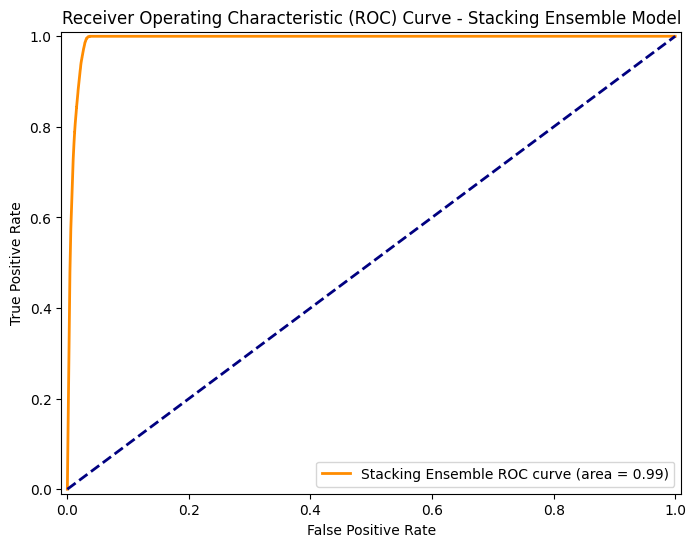

Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      0.99      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.88      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712

Stacking Ensemble Confusion Matrix:
[[229732   7302]
 [   176  24502]]
Stacking Ensemble Accuracy: 0.9714266063459069
Stacking Ensemble ROC-AUC: 0.9925945152615102
Models saved successfully.


In [3]:
!pip install --upgrade pandas numpy xgboost lightgbm optuna joblib matplotlib

# 2. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
import optuna
import xgboost as xgb
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression

# 3. Data Loading and Merging
# Define file paths (replace with your actual file paths)
x_train_path = 'X_Train_Data_Input.csv'
y_train_path = 'Y_Train_Data_Target.csv'
x_test_path = 'X_Test_Data_Input.csv'
y_test_path = 'Y_Test_Data_Target.csv'

# Read the CSV files
X_train = pd.read_csv(x_train_path)
y_train = pd.read_csv(y_train_path)
X_test = pd.read_csv(x_test_path)
y_test = pd.read_csv(y_test_path)

# Merge datasets on 'ID' column
train_data = pd.merge(X_train, y_train, on='ID')
test_data = pd.merge(X_test, y_test, on='ID')

# Check if 'target' column exists
target_column = 'target'  # Change if your target column has a different name
if target_column not in train_data.columns or target_column not in test_data.columns:
    raise ValueError(f"'{target_column}' column not found in the merged datasets.")

# Separate features and target
X_train = train_data.drop(columns=['ID', target_column])
y_train = train_data[target_column]
X_test = test_data.drop(columns=['ID', target_column])
y_test = test_data[target_column]

print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

# 4. Handling Missing Values
# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verify no missing values remain
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

# 5. Dropping Low-Importance Features
# List of columns to drop due to low importance
columns_to_drop = [
    'Column17', 'Column3', 'Column6', 'Column4', 'Column8', 'Column14',
    'Column2', 'Column5', 'Column0', 'Column19', 'Column15', 'Column12',
    'Column20', 'Column11', 'Column10', 'Column9', 'Column13', 'Column16', 'Column21'
]

# Verify that all columns to drop exist in the dataset
missing_columns = set(columns_to_drop) - set(X_train.columns)
if missing_columns:
    raise ValueError(f"The following columns to drop are missing in the dataset: {missing_columns}")

# Drop the columns from training and testing datasets
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

print("Remaining features after dropping low-importance columns:")
print(X_train.columns.tolist())

# 6. Balancing Classes by Undersampling
# Display original class distribution
class_counts = Counter(y_train)
print('Original class distribution:', class_counts)

# Identify minority and majority classes
minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)
minority_count = class_counts[minority_class]
desired_majority_count = 2 * minority_count

print(f"Minority class ({minority_class}) count: {minority_count}")
print(f"Desired majority class ({majority_class}) count: {desired_majority_count}")

# Get indices of majority and minority classes
majority_indices = y_train[y_train == majority_class].index
minority_indices = y_train[y_train == minority_class].index

# Check if undersampling is needed
if class_counts[majority_class] > desired_majority_count:
    # Randomly select desired number of majority class samples
    np.random.seed(42)  # For reproducibility
    selected_majority_indices = np.random.choice(
        majority_indices, size=desired_majority_count, replace=False)

    # Combine with all minority class samples
    indices_to_keep = np.concatenate([selected_majority_indices, minority_indices])
    X_resampled = X_train.loc[indices_to_keep].reset_index(drop=True)
    y_resampled = y_train.loc[indices_to_keep].reset_index(drop=True)
    print('Adjusted class distribution:', Counter(y_resampled))
else:
    print(f"No undersampling needed. Majority class count ({class_counts[majority_class]}) is already <= desired count ({desired_majority_count}).")
    X_resampled = X_train.copy()
    y_resampled = y_train.copy()

# 7. Hyperparameter Optimization with Optuna

# a. XGBoost Optimization
def xgb_objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'hist',  # Fast training on large datasets
        'use_label_encoder': False,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1e1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 1e1, log=True),
        'verbosity': 0
    }

    # Initialize XGBoost classifier
    model = xgb.XGBClassifier(**param, n_jobs=-1, random_state=42)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, valid_idx in cv.split(X_resampled, y_resampled):
        X_train_fold, X_valid_fold = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_train_fold, y_valid_fold = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_valid_fold, y_valid_fold)],  # Updated parameter
            verbose=False
        )

        preds = model.predict_proba(X_valid_fold)[:, 1]
        auc = roc_auc_score(y_valid_fold, preds)
        scores.append(auc)

    return np.mean(scores)

# Create a study for XGBoost
xgb_study = optuna.create_study(direction='maximize', study_name='XGBoost Optimization')
xgb_study.optimize(xgb_objective, n_trials=50, timeout=600)  # Adjust n_trials and timeout as needed

print("Best XGBoost Params:", xgb_study.best_params)
print("Best XGBoost AUC:", xgb_study.best_value)

# b. LightGBM Optimization
def lgb_objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1e1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 1e1, log=True),
    }

    # Initialize LightGBM classifier
    model = lgb.LGBMClassifier(**param, n_jobs=-1, random_state=42)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, valid_idx in cv.split(X_resampled, y_resampled):
        X_train_fold, X_valid_fold = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_train_fold, y_valid_fold = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_valid_fold, y_valid_fold)],
        )

        preds = model.predict_proba(X_valid_fold)[:, 1]
        auc = roc_auc_score(y_valid_fold, preds)
        scores.append(auc)

    return np.mean(scores)

# Create a study for LightGBM
lgb_study = optuna.create_study(direction='maximize', study_name='LightGBM Optimization')
lgb_study.optimize(lgb_objective, n_trials=50, timeout=600)  # Adjust n_trials and timeout as needed

print("Best LightGBM Params:", lgb_study.best_params)
print("Best LightGBM AUC:", lgb_study.best_value)

# 8. Training Optimized Models

# a. Training XGBoost
best_xgb_params = xgb_study.best_params
best_xgb_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',
    'use_label_encoder': False,
    'n_jobs': -1,
    'random_state': 42,
    'verbosity': 0
})

# Initialize XGBoost with best parameters
best_xgb = xgb.XGBClassifier(**best_xgb_params)

# Train on the full resampled training data
best_xgb.fit(
    X_resampled, y_resampled,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Predict on test data
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_proba_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# b. Training LightGBM
best_lgb_params = lgb_study.best_params
best_lgb_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'verbose': -1,
    'n_jobs': -1,
    'random_state': 42
})

# Initialize LightGBM with best parameters
best_lgb = lgb.LGBMClassifier(**best_lgb_params)

# Train on the full resampled training data
best_lgb.fit(
    X_resampled, y_resampled,
    eval_set=[(X_test, y_test)]
)

# Predict on test data
y_pred_lgb = best_lgb.predict(X_test)
y_pred_proba_lgb = best_lgb.predict_proba(X_test)[:, 1]

# Evaluate LightGBM
print("LightGBM Test Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM ROC-AUC:", roc_auc_score(y_test, y_pred_proba_lgb))
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

# 9. Creating an Ensemble Model (Stacking)
# Define base models
base_models = [
    ('xgb', best_xgb),
    ('lgb', best_lgb)
]

# Define meta-model
meta_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Initialize Stacking Classifier
stacking_ensemble = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1,
    passthrough=False  # Pass the original features to meta-model if True
)

# Train the stacking ensemble
stacking_ensemble.fit(X_resampled, y_resampled)

# Predict on test data
y_pred_stacking = stacking_ensemble.predict(X_test)
y_pred_proba_stacking = stacking_ensemble.predict_proba(X_test)[:, 1]

# Evaluate Stacking Ensemble
print("Stacking Ensemble Test Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Ensemble ROC-AUC:", roc_auc_score(y_test, y_pred_proba_stacking))
print("Stacking Ensemble Classification Report:")
print(classification_report(y_test, y_pred_stacking))
print("Stacking Ensemble Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))

# 10. Evaluating the Ensemble Model
# Calculate ROC curve and AUC for Stacking Ensemble
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_stacking)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Stacking Ensemble ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Stacking Ensemble Model')
plt.legend(loc="lower right")
plt.show()

# Additional Metrics
print("Stacking Ensemble Classification Report:")
print(classification_report(y_test, y_pred_stacking))

print("Stacking Ensemble Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))

print("Stacking Ensemble Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Ensemble ROC-AUC:", roc_auc_score(y_test, y_pred_proba_stacking))

# 11. Saving the Models (Optional)
# Save individual models
joblib.dump(best_xgb, 'best_xgb_model.pkl')
joblib.dump(best_lgb, 'best_lgb_model.pkl')

# Save the stacking ensemble model
joblib.dump(stacking_ensemble, 'stacking_ensemble_model.pkl')

print("Models saved successfully.")
